<a href="https://colab.research.google.com/github/amicarellade/APCSP-Final/blob/master/NLPEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Matts directories
business = pd.read_csv("/content/drive/MyDrive/WPI/Senior Year/NLP/CS525/yelp_filtered_business.csv")
filtered_review = pd.read_csv("/content/drive/MyDrive/WPI/Senior Year/NLP/CS525/yelp_filtered_review.csv")
#review = pd.read_csv("/content/drive/MyDrive/WPI/Senior Year/NLP/CS525/yelp_review.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# !pip3 install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pickle4: filename=pickle4-0.0.1-py2.py3-none-any.whl size=19707 sha256=c9fed117f9e208162aa98764032ceda42cc84c9792d82eca4fd706adb4db3ceb
  Stored in directory: /root/.cache/pip/wheels/a5/ab/c5/82811cb030f390be4b152c0b13d9c4263e31a2ccde83850516
Successfully built pickle4


In [18]:
# Dante directories
import pickle5 as pickle
import pickle as pkl
with open("/content/drive/MyDrive/ST: NLP/yelp_merged.pkl", "rb") as f:
  apkl = pickle.load(f)
df = pd.DataFrame(apkl)

In [19]:
df

,business_id,stars,review_count,tips,dates,reviews
0,MTSW4McQd7CbVtyjqoe9mw,4.0,80,"[Love their pastries and drinks!, Really good ...","[2010-08-18 17:05:36, 2010-11-25 17:45:31, 201...",[This is nice little Chinese bakery in the hea...
1,0bPLkL0QhhPO5kt1_EXmNQ,4.5,100,[Always a pleasant experience. The food is fre...,"[2010-08-26 17:52:51, 2011-02-13 00:43:54, 201...",[The worst Chicken Parm. Sandwich I've ever ea...
2,MUTTqe8uqyMdBl186RmNeA,4.0,245,"[Get the shrimp toast!, Soft opening now.\n\nh...","[2017-11-25 02:28:19, 2017-11-28 23:17:19, 201...",[Stopped in to check out this new spot around ...
3,ROeacJQwBeh05Rqg7F6TCg,4.5,205,"[They're open on Sunday's until 9 pm!, Small p...","[2013-12-06 22:32:24, 2013-12-18 02:03:03, 201...","[This place is fantastic! Delicious, simple, ..."
4,9OG5YkX1g2GReZM0AskizA,2.5,339,"[Yummy eggplant quadratini!, Lunch with a pet ...","[2010-11-11 14:05:01, 2010-12-31 20:24:03, 201...",[Great bar Happy Hour 4-7 every day. Wine & Dr...
...,...,...,...,...,...,...
29250,wVxXRFf10zTTAs11nr4xeA,3.0,55,"[Primos nuff said, Call in cause there's a lit...","[2010-04-20 14:44:26, 2010-05-03 22:49:12, 201...","[If you're looking for a good hoagie, go with ..."
29251,WXNag-tmudrFHFlfNLogWg,4.0,71,"[Got donations?, Saturday's & Sunday's $3 mimo...","[2016-05-25 19:46:51, 2016-05-25 22:41:25, 201...","[Happy hour and bar are amazing! $3 wine, beer..."
29252,2MAQeAqmD8enCT2ZYqUgIQ,4.0,204,[Good all around- not just for date night anym...,"[2010-07-16 02:45:16, 2010-08-26 01:22:42, 201...",[We ended up leaving...\nWe had made a reserva...
29253,w_4xUt-1AyY2ZwKtnjW0Xg,4.5,998,[It's pretty good I think they could work on c...,"[2010-05-07 01:02:09, 2010-05-08 20:25:27, 201...",[I must say that this place is amazing. Comfor...


##Eploratory Data Analysis

In [ ]:
#Retrieving Data shape and output
print(filtered_review.shape)
filtered_review.head()

(5066392, 10)


,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
4,6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18


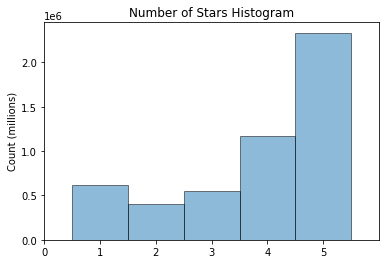

In [ ]:
#Histogram of all reviews showing the count of stars
bins = np.arange(7) -0.5
plt.hist(filtered_review.stars, bins, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('Count (millions)')
plt.title('Number of Stars Histogram')
plt.xticks(range(6))
plt.xlim([0, 6])

plt.show()

[  0   2   5   1   3   4  12   6   9   7  11  26  10   8  25  18  15  13
  21  16  14  24  17  22  20  38  19  27  23  32  28  39  33  40  44  30
  42  34  29  37  88  35  48  43  54  45  68  46  67  65  62 113  61  57
  31  47  53  75 141  36 105  78  52  58  74 133  76  93  71 254  63  49
  83  86  81  59  55  92  41 101 103  97 129 130  82  56 107  60  94 114
  79 139  73 169 251 200  85  64 222 143 181 179 190 175 277 126 127 167
 135 256 146 112  77 152 144 235  95 228 240  84  99 232  89 106 202 236
 116  51  72  87  66 134 283  50  69 191 117  -1  91 104 157  90  80 102
 155  70 100 159 150 201 121  98 119 227 110  96 266 324 154 148 180 361
 241 326 310 287 109 278 332 182 307 336 342 345 341 147 188 164 375 351
 137 369 357 313 346 344 378 347 353 333 370 118 158 792 177 288]


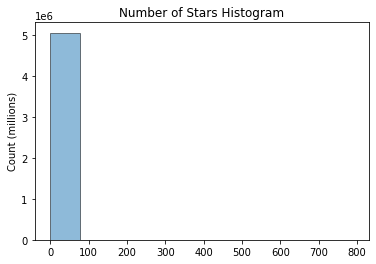

In [ ]:
print(filtered_review.funny.unique())
bins = np.arange(7) -0.5
#plt.hist(filtered_review.funny, bins, alpha=0.5, histtype='bar', ec='black')
plt.hist(filtered_review.funny, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('Count (millions)')
plt.title('Number of Stars Histogram')
#plt.xticks(range(6))
#plt.xlim([0, 6])

plt.show()

# NER BERT